In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Uber data/My Uber Drives - 2016.csv.xls'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Uber data/My Uber Drives - 2016.csv.xls')

In [4]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-02-2016 00:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-01-2016 00:00,02-04-2016 00:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
data.drop(data.index[1155],inplace=True)

Find Duplicated Data


In [8]:
data[data.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


Drop Duplicated Data

In [9]:
data.drop_duplicates(inplace=True)

There we have 4 rows having starting and end-time exactly equal i.e. zero trip time, while having non-zero miles (distance) - which cannot be possible.

In [10]:
data[data['START_DATE*'] == data['END_DATE*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
751,09-06-2016 17:49,09-06-2016 17:49,Business,Unknown Location,Unknown Location,69.1,NaN
761,9/16/2016 7:08,9/16/2016 7:08,Business,Unknown Location,Unknown Location,1.6,NaN
798,10-08-2016 15:03,10-08-2016 15:03,Business,Karachi,Karachi,3.6,NaN
807,10/13/2016 13:02,10/13/2016 13:02,Business,Islamabad,Islamabad,0.7,NaN


Drop those tables

In [11]:
data.drop(data.index[[751, 761, 798, 807]], inplace=True)

Converting 'START_DATE' and 'END_DATE' to Datetime format

In [12]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'])
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'])

Plotting Business vs Personal Trips

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


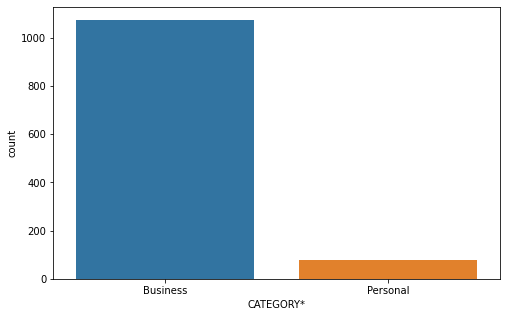

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data['CATEGORY*'])
plt.show()

Plotting the Frequency for the Purpose of Trip

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


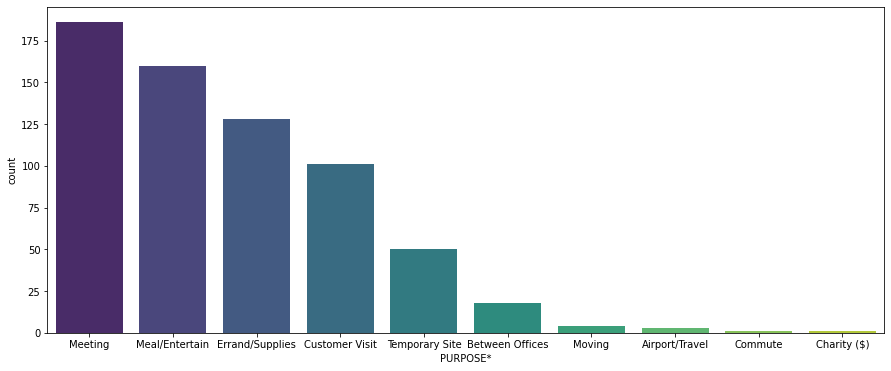

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data['PURPOSE*'], order=data['PURPOSE*'].value_counts().index, palette='viridis')
plt.show()

Plotting the Frequency for the Purpose of Trip

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


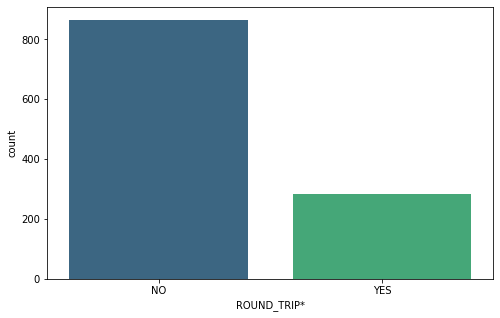

In [37]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START*'] == x['STOP*']:
        return 'YES'
    else:
        return 'NO'
    
data['ROUND_TRIP*'] = data.apply(round, axis=1)

sns.countplot(data['ROUND_TRIP*'], order=data['ROUND_TRIP*'].value_counts().index, palette='viridis')
plt.show()

Entering Month Name and evaluating Frequency of Trip in each Month

In [16]:
data['MONTH*'] = pd.DatetimeIndex(data['START_DATE*']).month

In [17]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

data['MONTH*'] = data['MONTH*'].map(dic)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


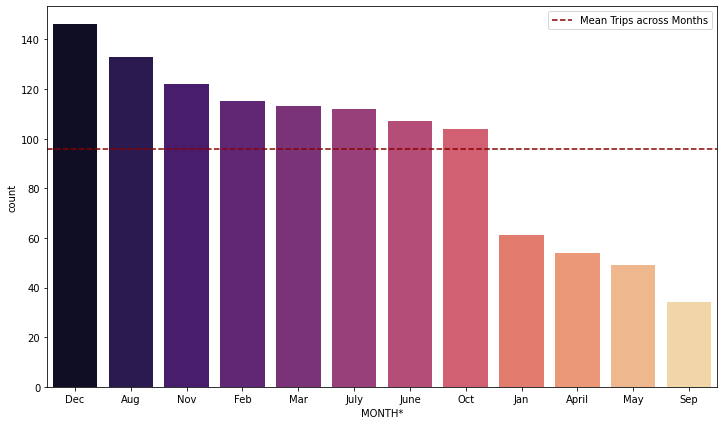

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(data['MONTH*'], order=data['MONTH*'].value_counts().index, palette='magma')
plt.axhline(data['MONTH*'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

Above plot shows that December has highest number of trips

**Round Trip against Months**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


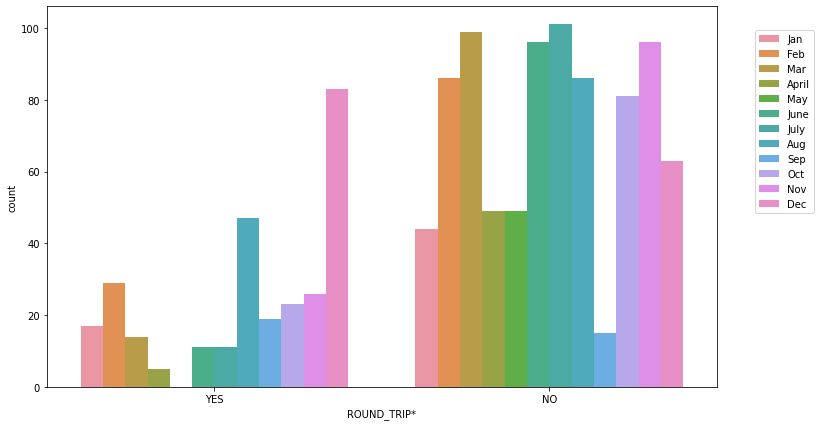

In [19]:
plt.figure(figsize=(12,7))
a=sns.countplot(data['ROUND_TRIP*'],hue=data['MONTH*'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

Mean distance of Trip w.r.t Category

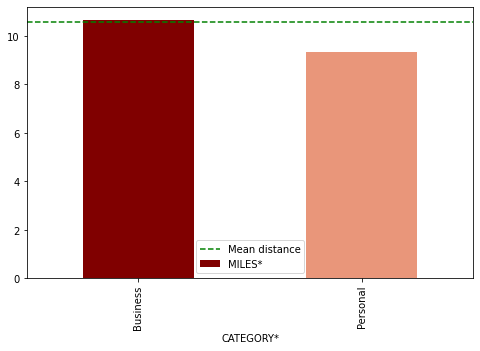

In [20]:
plt.figure(figsize=(8,5))
data.groupby('CATEGORY*')['MILES*'].mean().plot.bar(color=['maroon','darksalmon'])
plt.axhline(data['MILES*'].mean(), linestyle='--', color='green', label='Mean distance')
plt.legend()
plt.show()

Now we need to know which number of hours has highest trips

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


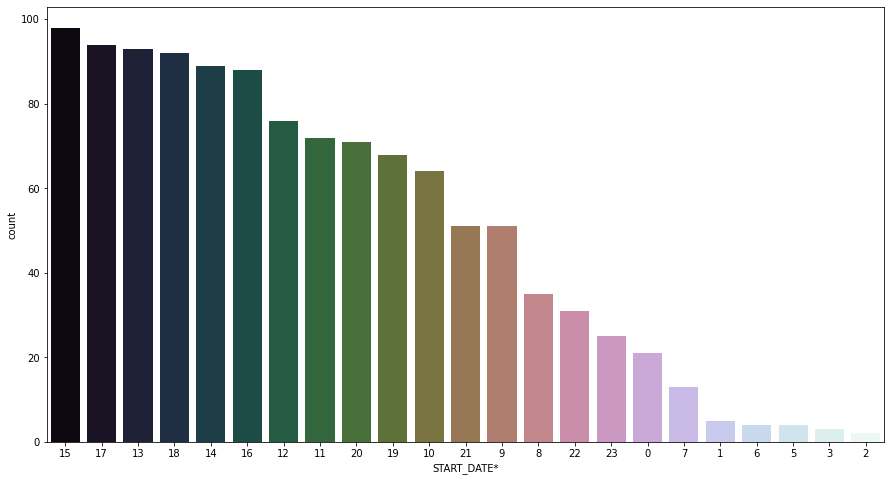

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data['START_DATE*'].dt.hour, palette='cubehelix',
              order = data['START_DATE*'].dt.hour.value_counts().index)
plt.show()

From above graph it is found that higest number of trips occur between 12p.m - 3p.m, among which 3pm has highest trips

**Now we want to determine the speed for each trip**

In [24]:
def timings(x):
    seconds = (x['END_DATE*'] - x['START_DATE*']).seconds
    return seconds

data['TRIP_HOURS*'] = (data.apply(timings, axis=1)/3600).round(decimals=2)

Now we are interested in getting to know which day of week has highest number of trips

In [27]:
def day(x):
    day = x['START_DATE*'].day_name()
    return day

data['DAY*'] = data.apply(day, axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


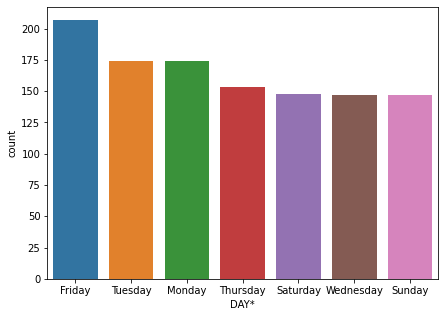

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(data['DAY*'], order = data['DAY*'].value_counts().index)
plt.show()

Above figure shows that highest trips were made on Friday

**Category wise trip per day**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


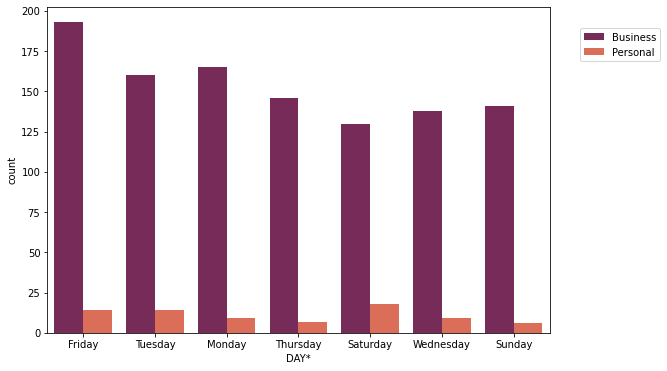

In [29]:
plt.figure(figsize=(9,6))
a=sns.countplot(data['DAY*'],hue=data['CATEGORY*'], palette='rocket',
                order=data['DAY*'].value_counts().index)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

**Category of Trip per Month**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


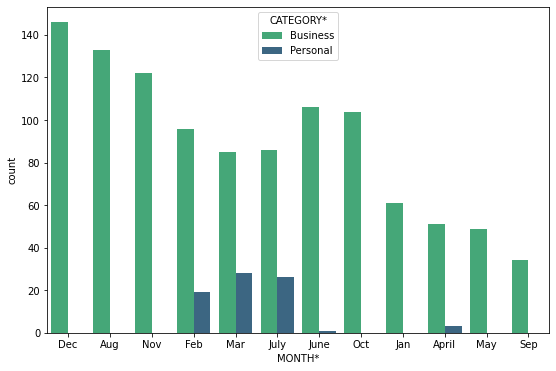

In [30]:
plt.figure(figsize=(9,6))
sns.countplot(data['MONTH*'],hue=data['CATEGORY*'], palette = 'viridis_r',
              order=data['MONTH*'].value_counts().index)
plt.show()

It can be seen clearly from the above graph that most of the trips made are Business across the month, only few Personal trips were made. Also, highest Business trips were made in the month of December.

While highest number of Personal trip were on March/ July

**It is necessary to find which hours of the day highest trips are made**

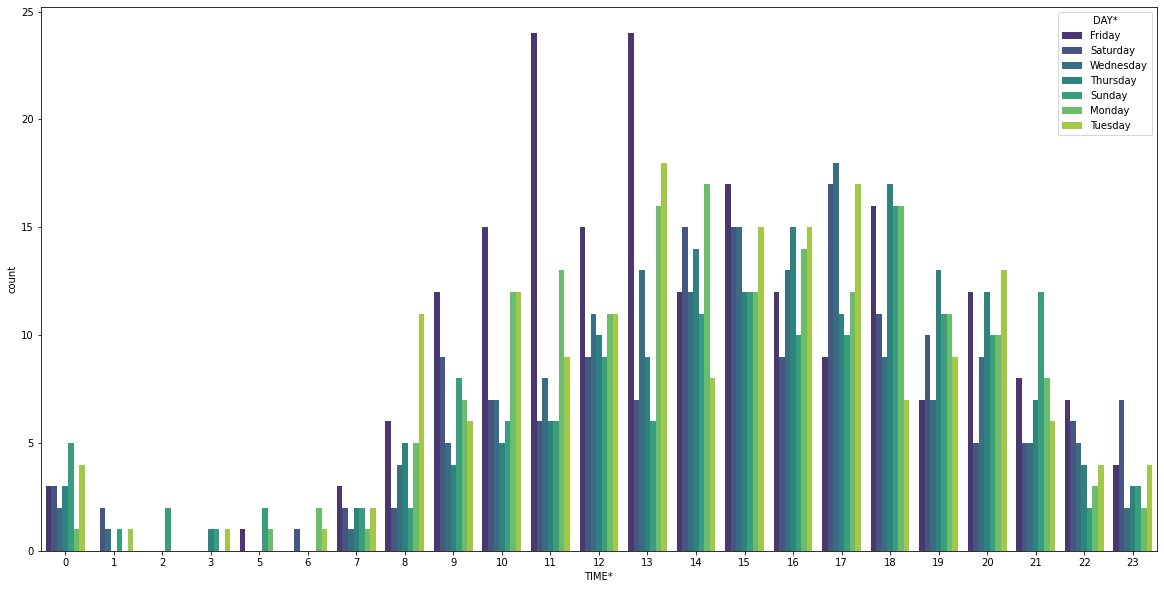

In [31]:
data['TIME*'] = data['START_DATE*'].dt.hour

plt.figure(figsize=(20,10))
sns.countplot(data=data, x=data['TIME*'], hue=data['DAY*'],
              palette="viridis", )
plt.show()

From above plot, it can be seen that on Friday 11am - 12pm are peak hours of the trips

**Now we want to know how many trips were made on Day time and how many on Night time**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


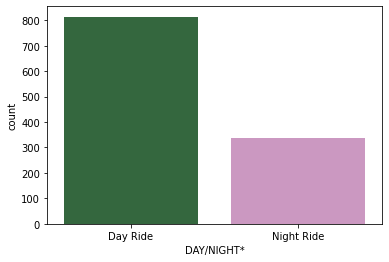

In [32]:
a = pd.to_datetime(['18:00:00']).time

data['DAY/NIGHT*'] = data.apply(lambda x : 'Night Ride' if x['START_DATE*'].time() > a else 'Day Ride', axis=1)

sns.countplot(data['DAY/NIGHT*'], palette='cubehelix' , order = data['DAY/NIGHT*'].value_counts().index)
plt.show()

Maximum trips were made during Day Time

**Day/Night against Days**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


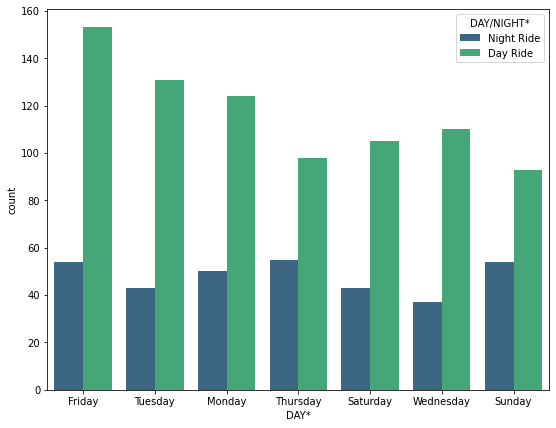

In [33]:
plt.figure(figsize=(9,7))
sns.countplot(data['DAY*'], hue=data['DAY/NIGHT*'], palette='viridis' ,
              order=data['DAY*'].value_counts().index)
plt.show()

Highest number of Day rides were on Friday while Night rides were on Sunday/Thursday